In [106]:
import pickle
import pandas as pd
import networkx as nx
import numpy as np

from matplotlib import pyplot as plt
from networkx.algorithms import bipartite
from collections import Counter

In [4]:
with open("Processed Dataframe.df", "rb") as f:
    df = pickle.load(f)
df.head(5)

,Dependencies,Tags,Licence,Package Version,Python Version,Classifiers,Dependant Libraries Count,Operating System,Typing,Framework,Natural Language,Programming Language,Environment,License,Development Status,Topic,Intended Audience,Dependencies count
0-core-client,[redis],None,Apache 2.0,1.1.0a8,None,[],0.0,None,None,None,None,None,None,None,None,None,None,1
0-orchestrator,"[jinja2, aioredis, python-dateutil, etcd3, net...",None,Apache 2.0,1.1.0a8,None,[],0.0,None,None,None,None,None,None,None,None,None,None,5
01d61084-d29e-11e9-96d1-7c5cf84ffe8e,"[attrs, click]",None,None,0.1.0,">=3.7,<4.0","[Programming Language :: Python :: 3, Programm...",2.0,None,None,None,None,Python,None,None,None,None,None,2
0x-contract-addresses,"[coveralls, mypy, twine, mypy-extensions, band...",ethereum cryptocurrency 0x decentralized block...,Apache 2.0,3.0.0,">=3.6, <4","[Development Status :: 5 - Production/Stable, ...",6.0,OS Independent,None,None,English,Python,None,OSI Approved,5 - Production/Stable,"[Internet, Office/Business, Other/Nonlisted To...","[Developers, Financial and Insurance Industry]",13
0x-contract-artifacts,"[coveralls, mypy, twine, mypy-extensions, band...",ethereum cryptocurrency 0x decentralized block...,Apache 2.0,3.0.0,">=3.6, <4","[Development Status :: 5 - Production/Stable, ...",4.0,OS Independent,None,None,English,Python,None,OSI Approved,5 - Production/Stable,"[Internet, Office/Business, Other/Nonlisted To...","[Developers, Financial and Insurance Industry]",13


In [151]:
edges = []
for package, topics in df["Topic"].items():
    if isinstance(topics, list):
        for t in topics:
            edges.append((package, t))
    elif isinstance(topics, str):
        edges.append((package, topics))

topics = set([x[1] for x in edges])
nodes = set([x[0] for x in edges])

In [152]:
B = nx.Graph()
B.add_nodes_from(nodes, bipartite=0)
B.add_nodes_from(topics, bipartite=1)
B.add_edges_from(edges)

In [160]:
G = bipartite.weighted_projected_graph(B, topics)
nodelist = G.nodes()

# Ancho de los enlaces. Coinciden 'edges' con 'widths'.
widths = nx.get_edge_attributes(G, 'weight')
widths_arr = np.array(list(widths.values()))
widths_norm = widths_arr/max(widths_arr)*20

# Tamaño de los nodos.
index_map = {v: i for i, v in enumerate(nodelist)}
topics_count = Counter([x[1] for x in edges])
topics_count = dict(sorted(topics_count.items(), key=lambda pair: index_map[pair[0]]))

node_size = np.array(list(topics_count.values()))
node_size_norm = node_size/max(node_size)*2000

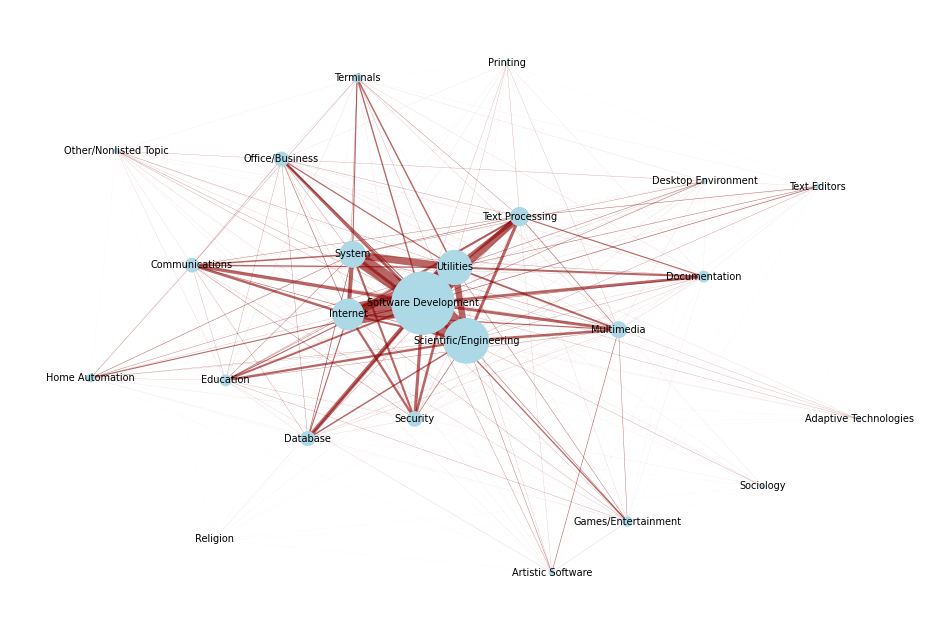

In [162]:
plt.figure(figsize=(12,8))

pos = nx.spring_layout(G, k = 10)
nx.draw_networkx_nodes(G, pos,
                       nodelist=list(nodelist),
                       node_size=node_size_norm,
                       node_color='lightblue',
                       alpha=1)
nx.draw_networkx_edges(G, pos,
                       edgelist = widths.keys(),
                       width=widths_norm,
                       edge_color='darkred',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black',
                        font_size = 7)
plt.box(False)
plt.show()